# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [4]:
data=pd.read_csv("Countries_exercise.csv",index_col=0)
data

,Longitude,Latitude
name,,
Aruba,-69.982677,12.520880
Afghanistan,66.004734,33.835231
Angola,17.537368,-12.293361
Anguilla,-63.064989,18.223959
Albania,20.049834,41.142450
...,...,...
Samoa,-172.164851,-13.753243
Yemen,47.586762,15.909280
South Africa,25.083901,-29.000341


Remove the duplicate index column from the dataset. 

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

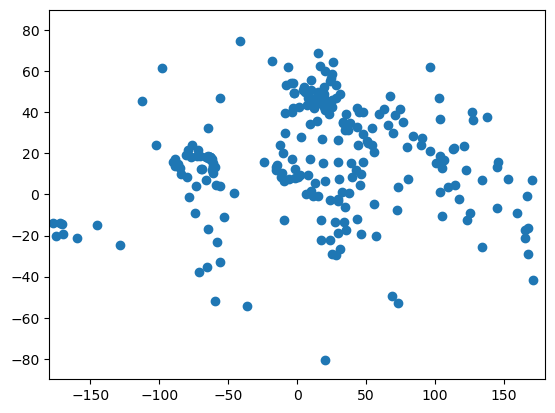

In [10]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather <i>'Longitude'</i> and <i>'Laditude'</i>.

In [12]:
x=data.iloc[:,1:3]
x

,Latitude
name,
Aruba,12.520880
Afghanistan,33.835231
Angola,-12.293361
Anguilla,18.223959
Albania,41.142450
...,...
Samoa,-13.753243
Yemen,15.909280
South Africa,-29.000341


## Clustering

Use 4 clusters initially.

In [46]:
kmean=KMeans(4)
kmean.fit(x)

KMeans(n_clusters=4)

### Clustering results

In [47]:
identified_clusters=kmean.fit_predict(x)
identified_clusters

array([2, 1, 0, 2, 1, 1, 1, 2, 3, 1, 0, 3, 0, 3, 2, 0, 1, 1, 0, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 3, 1, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 3, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2,
       2, 2, 2, 3, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 3, 1, 1, 1,
       2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 2, 3, 2, 2, 0, 1, 1, 2, 0, 3, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2,
       1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 3, 0, 0, 2, 2, 1, 2,
       2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1,
       1, 2, 0, 0, 1, 3, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 3, 0, 0])

In [48]:
data_with_clusters=data.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Longitude,Latitude,Cluster
name,,,
Aruba,-69.982677,12.520880,2
Afghanistan,66.004734,33.835231,1
Angola,17.537368,-12.293361,0
Anguilla,-63.064989,18.223959,2
Albania,20.049834,41.142450,1
...,...,...,...
Samoa,-172.164851,-13.753243,0
Yemen,47.586762,15.909280,2
South Africa,25.083901,-29.000341,3


Plot the data once again but separate the data by the clusters we defined.  


## Plot the data

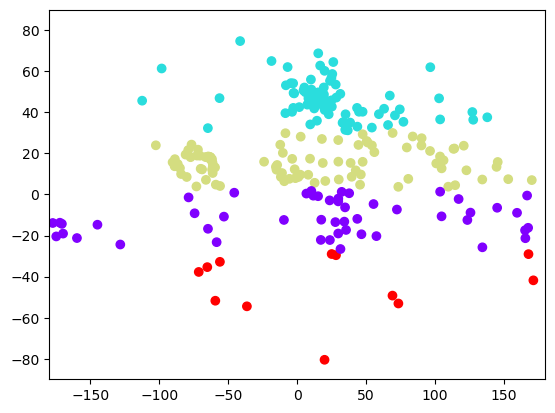

In [49]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [27]:
kmean.inertia_

17818.22223475777

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [37]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
wcss

[169227.7537444962,
 63616.113900075914,
 25810.012450093494,
 17818.22223475777,
 12408.46875376572,
 8275.273966938605,
 6669.873165243502,
 4891.684079367993,
 4071.9738330239743,
 3270.5166211566957]

### The Elbow Method

Text(0, 0.5, 'Within_cluster sum of square')

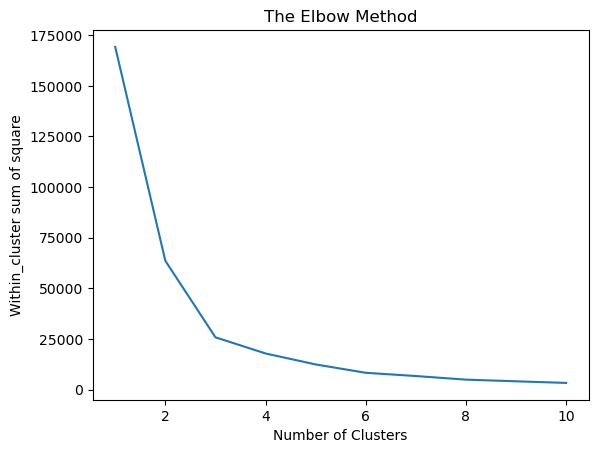

In [41]:
number_clusters=range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel("Within_cluster sum of square")

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

Compare the scatter plots to determine which one to use in our further analysis. 

<i>Hint: we already created the scatter plot for 4 clusters, so we only have to slightly alter our code.</i>

In [71]:
kmean=KMeans(2)
kmean.fit(x)


KMeans(n_clusters=2)

In [72]:
identified_clusters=kmean.fit_predict(x)
identified_clusters

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
data_with_clusters=data.copy()
data_with_clusters['clusters']=identified_clusters
data_with_clusters


,Longitude,Latitude,clusters
name,,,
Aruba,-69.982677,12.520880,0
Afghanistan,66.004734,33.835231,1
Angola,17.537368,-12.293361,0
Anguilla,-63.064989,18.223959,0
Albania,20.049834,41.142450,1
...,...,...,...
Samoa,-172.164851,-13.753243,0
Yemen,47.586762,15.909280,0
South Africa,25.083901,-29.000341,0


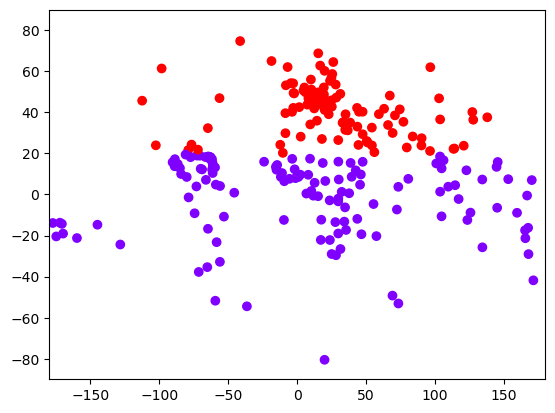

In [74]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()
